<a href="https://colab.research.google.com/github/danielportugalHTW/PROJ_BI_MASTER/blob/main/Consultorio_Odonto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importação dos pacotes
import nltk
import re
import os
import string
import pandas as pd


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes             import MultinomialNB
from sklearn                         import metrics
from sklearn.model_selection         import cross_val_predict
from sklearn.ensemble                import RandomForestClassifier
from google.colab                    import drive
from nltk.corpus                     import stopwords

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
workdir_path = '/content/drive/My Drive'
os.chdir(workdir_path)

In [ ]:
dados = pd.read_csv('Base_Consultorio_Odonto.csv', sep = ';')

In [ ]:
# Essa expressão regular remove todas as palavras com números e também torna todas as palavras em minúsculas
lower_alpha = lambda x: re.sub(r"""\w*\d\w*""", ' ', x.lower())
dados['Descricao'] = dados.Descricao.map(lower_alpha)

# Exibo os 5 primeiro registros do meu dataframe
dados.head()

,ID,Classificação,Descricao
0,1,Positivo,consultorio maravilhoso! a dentista juliana eh...
1,2,Positivo,"profissional incrível de uma dedicação, um amo..."
2,3,Positivo,"dra. juliana profissional competente, dedicada..."
3,4,Positivo,atendimento excelente. dra juliana sempre muit...
4,5,Positivo,profissional competente tanto do ponto de vist...


In [ ]:
# Essa expressão regular remove toda a pontuação
punc_re = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
dados['Descricao'] = dados.Descricao.map(punc_re)

dados.head()

,ID,Classificação,Descricao
0,1,Positivo,consultorio maravilhoso a dentista juliana eh...
1,2,Positivo,profissional incrível de uma dedicação um amo...
2,3,Positivo,dra juliana profissional competente dedicada...
3,4,Positivo,atendimento excelente dra juliana sempre muit...
4,5,Positivo,profissional competente tanto do ponto de vist...


In [ ]:
# Tokenize as Descricao em palavras
nltk.download('punkt')
from nltk.tokenize import word_tokenize

dados['tokens'] = dados.Descricao.map(word_tokenize)
dados.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,ID,Classificação,Descricao,tokens
0,1,Positivo,consultorio maravilhoso a dentista juliana eh...,"[consultorio, maravilhoso, a, dentista, julian..."
1,2,Positivo,profissional incrível de uma dedicação um amo...,"[profissional, incrível, de, uma, dedicação, u..."
2,3,Positivo,dra juliana profissional competente dedicada...,"[dra, juliana, profissional, competente, dedic..."
3,4,Positivo,atendimento excelente dra juliana sempre muit...,"[atendimento, excelente, dra, juliana, sempre,..."
4,5,Positivo,profissional competente tanto do ponto de vist...,"[profissional, competente, tanto, do, ponto, d..."


In [ ]:
# Isso cria uma lista enorme combinando todos os valores de tokens
word_list = sum(dados.tokens.tolist(), [])

In [ ]:
# Listo as palavras para validar
word_list[:10]

['consultorio',
 'maravilhoso',
 'a',
 'dentista',
 'juliana',
 'eh',
 'uma',
 'otima',
 'profissional',
 'super']

In [ ]:
# Estas são as etapas para encontrar as palavras mais comuns
from collections import Counter

# Converte a lista em um dicionário com contagem de valores
word_counts = Counter(word_list)

# Inverter a chave / valores no dicionário para classificar e Reverter a chave / valores no dicionário para classificar
word_counts = list(zip(word_counts.values(), word_counts.keys()))

# Classifique a lista por contagem
word_counts = sorted(word_counts, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts[:10]

[(95, 'e'),
 (73, 'que'),
 (73, 'de'),
 (58, 'o'),
 (47, 'a'),
 (44, 'não'),
 (33, 'com'),
 (32, 'um'),
 (28, 'uma'),
 (24, 'é')]

In [ ]:
# Remove as stop words

nltk.download("stopwords")

stop_words = stopwords.words('portuguese')
stop_words.append('é')

stop_lambda = lambda x: [y for y in x if y not in stop_words]
dados['tokens_stop'] = dados.tokens.apply(stop_lambda)
dados.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ID,Classificação,Descricao,tokens,tokens_stop
0,1,Positivo,consultorio maravilhoso a dentista juliana eh...,"[consultorio, maravilhoso, a, dentista, julian...","[consultorio, maravilhoso, dentista, juliana, ..."
1,2,Positivo,profissional incrível de uma dedicação um amo...,"[profissional, incrível, de, uma, dedicação, u...","[profissional, incrível, dedicação, amor, supe..."
2,3,Positivo,dra juliana profissional competente dedicada...,"[dra, juliana, profissional, competente, dedic...","[dra, juliana, profissional, competente, dedic..."
3,4,Positivo,atendimento excelente dra juliana sempre muit...,"[atendimento, excelente, dra, juliana, sempre,...","[atendimento, excelente, dra, juliana, sempre,..."
4,5,Positivo,profissional competente tanto do ponto de vist...,"[profissional, competente, tanto, do, ponto, d...","[profissional, competente, tanto, ponto, vista..."


In [ ]:
# Vamos encontrar as palavras mais comuns depois de limpar os dados e criar uma lista enorme combinando todos os valores de tokens
token_stop_positivo = dados[ dados['Classificação'] == 'Positivo']
token_stop_positivo = token_stop_positivo['tokens_stop']
word_list_clean_positive = sum(token_stop_positivo.tolist(), [])
word_list_clean_positive[:10]

token_stop_negativo = dados[ dados['Classificação'] == 'Negativo']
token_stop_negativo = token_stop_negativo['tokens_stop']
word_list_clean_negative = sum(token_stop_negativo.tolist(), [])
word_list_clean_negative[:10]

['fiquei',
 'satisteito',
 'tratamento',
 'tratamento',
 'caro',
 'acesso',
 'cadeirantes',
 'tratamento',
 'bem',
 'realizado']

In [ ]:
from collections import Counter

# Positivo
# Converte a lista em um dicionário com contagem de valores
word_counts_clean_positive = Counter(word_list_clean_positive)
a = word_counts_clean_positive
# Inverta a chave / valores no dicionário para classificar
word_counts_clean_positive = list(zip(word_counts_clean_positive.values(), word_counts_clean_positive.keys()))
# Classifique a lista por contagem
word_counts_clean_positive = sorted(word_counts_clean_positive, reverse=True)
# Imprime as 10 palavras mais comuns
word_counts_clean_positive[:10]


# Negativo
# Converte a lista em um dicionário com contagem de valores
word_counts_clean_negative = Counter(word_list_clean_negative)
b = word_counts_clean_negative
# Inverta a chave / valores no dicionário para classificar
word_counts_clean_negative = list(zip(word_counts_clean_negative.values(), word_counts_clean_negative.keys()))
# Classifique a lista por contagem
word_counts_clean_negative = sorted(word_counts_clean_negative, reverse=True)
# Imprime as 10 palavras mais comuns
#word_counts_clean_negative[:10]

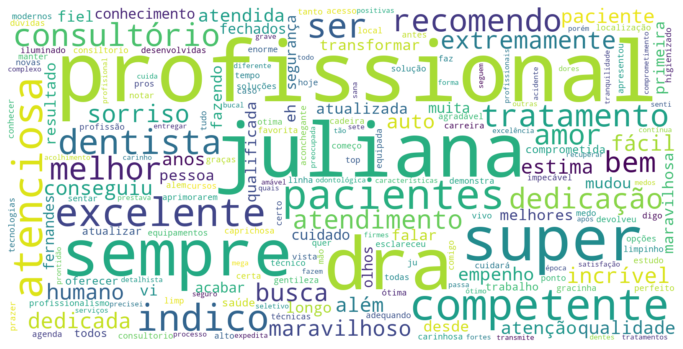

In [ ]:
# Código para gerar o wordcloud

!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = word_list_clean_positive
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color='white').fit_words(a)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

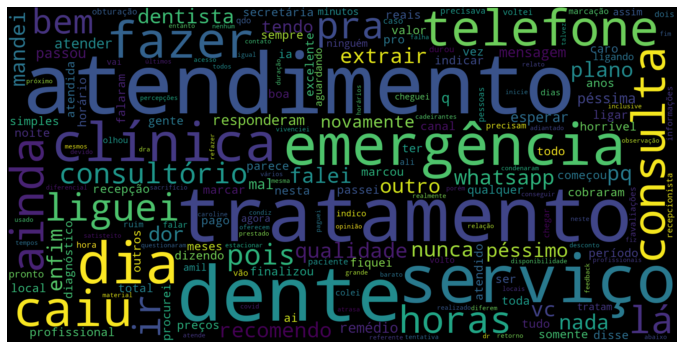

In [ ]:
text = word_list_clean_negative
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color='black').fit_words(b)
# wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**1 - Análise de Sentimento com Naive Bayes Multinomial**

In [ ]:
comentarios = dados["Descricao"].values
comentarios

array(['consultorio maravilhoso  a dentista juliana eh uma otima profissional  super caprichosa e competente o consiltorio eh muito limp  bem equipada alem de ser uma gracinha  ',
       'profissional incrível de uma dedicação  um amor    super atenciosa  sem falar do consultório    fácil acesso  aconchegante e de primeira    super  indico e não vivo sem    eu digo   antes de ser um dentista melhor  seja um ser humano melhor    \ne a ju  nossa é  um ser humano  iluminado   ',
       'dra  juliana profissional competente  dedicada  atenciosa que com seu alto profissionalismo conseguiu um resultado impecável e devolveu minha auto estima  o consultório com equipamentos modernos  agradável e de fácil localização  \nalém de uma gentileza enorme comigo adequando a agenda dela com a minha \nindico muito ',
       'atendimento excelente  dra juliana sempre muito carinhosa e atenciosa com seus pacientes  melhor profissional que já tive o prazer de conhecer  indico muito  ',
       'profissional

In [ ]:
classes = dados["Classificação"].values
classes

array(['Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo',
       'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo',
       'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo',
       'Positivo', 'Positivo', 'Positivo', 'Negativo', 'Negativo',
       'Negativo', 'Negativo', 'Negativo', 'Negativo', 'Negativo',
       'Negativo', 'Negativo', 'Negativo', 'Negativo', 'Negativo',
       'Negativo', 'Positivo', 'Positivo', 'Positivo', 'Positivo',
       'Positivo', 'Positivo', 'Positivo', 'Negativo', 'Negativo',
       'Negativo', 'Negativo', 'Negativo', 'Negativo', 'Negativo',
       'Negativo', 'Negativo', 'Negativo', 'Negativo', 'Positivo'],
      dtype=object)

In [ ]:
vectorizer = CountVectorizer(analyzer = "word")
freq_comentarios = vectorizer.fit_transform(comentarios)
modelo = MultinomialNB()
modelo.fit(freq_comentarios, classes)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
teste_modelo = ['péssimo atendimento']
freq_testes = vectorizer.transform(teste_modelo)
modelo.predict(freq_testes)

array(['Negativo'], dtype='<U8')

In [ ]:
resultados = cross_val_predict(modelo, freq_comentarios, classes, cv = 10)
resultados

array(['Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo',
       'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo',
       'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo',
       'Positivo', 'Positivo', 'Positivo', 'Negativo', 'Negativo',
       'Positivo', 'Negativo', 'Negativo', 'Negativo', 'Negativo',
       'Negativo', 'Negativo', 'Negativo', 'Negativo', 'Negativo',
       'Negativo', 'Positivo', 'Positivo', 'Negativo', 'Positivo',
       'Positivo', 'Positivo', 'Positivo', 'Negativo', 'Negativo',
       'Negativo', 'Negativo', 'Negativo', 'Negativo', 'Positivo',
       'Negativo', 'Negativo', 'Negativo', 'Negativo', 'Positivo'],
      dtype='<U8')

In [ ]:
metrics.accuracy_score(classes, resultados)

0.94

In [ ]:
sentimentos = ["Positivo", "Negativo"]
print(metrics.classification_report(classes, resultados, sentimentos))

              precision    recall  f1-score   support

    Positivo       0.93      0.96      0.94        26
    Negativo       0.96      0.92      0.94        24

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



In [ ]:
print(pd.crosstab(classes, resultados, rownames = ["Real"], colnames=["Predito"], margins=True))

Predito   Negativo  Positivo  All
Real                             
Negativo        22         2   24
Positivo         1        25   26
All             23        27   50


**2 - Melhorando o modelo com Bigrams**

In [ ]:
vectorizer = CountVectorizer(ngram_range = (1, 2))
freq_comentarios = vectorizer.fit_transform(comentarios)

modelo = MultinomialNB()
modelo.fit(freq_comentarios, classes)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
resultados = cross_val_predict(modelo, freq_comentarios, classes, cv = 10)
resultados

array(['Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo',
       'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo',
       'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo',
       'Positivo', 'Positivo', 'Positivo', 'Negativo', 'Positivo',
       'Positivo', 'Positivo', 'Negativo', 'Negativo', 'Negativo',
       'Negativo', 'Negativo', 'Negativo', 'Negativo', 'Negativo',
       'Negativo', 'Positivo', 'Positivo', 'Negativo', 'Positivo',
       'Positivo', 'Positivo', 'Positivo', 'Negativo', 'Negativo',
       'Negativo', 'Negativo', 'Negativo', 'Negativo', 'Positivo',
       'Negativo', 'Negativo', 'Negativo', 'Negativo', 'Positivo'],
      dtype='<U8')

In [ ]:
metrics.accuracy_score(classes, resultados)

0.9

In [ ]:
print(metrics.classification_report(classes, resultados, sentimentos))

              precision    recall  f1-score   support

    Positivo       0.86      0.96      0.91        26
    Negativo       0.95      0.83      0.89        24

    accuracy                           0.90        50
   macro avg       0.91      0.90      0.90        50
weighted avg       0.91      0.90      0.90        50



In [ ]:
print(pd.crosstab(classes, resultados, rownames = ["Real"], colnames = ["Predito"], margins = True))

Predito   Negativo  Positivo  All
Real                             
Negativo        20         4   24
Positivo         1        25   26
All             21        29   50


**3 - Melhorando o Modelo Com Randow Forest**

In [ ]:
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None,stop_words = stop_words, max_features = 5000)

In [ ]:
train_data_features = vectorizer.fit_transform(comentarios)
train_data_features

<50x720 sparse matrix of type '<class 'numpy.int64'>'
	with 1158 stored elements in Compressed Sparse Row format>

In [ ]:

forest = RandomForestClassifier(n_estimators = 100)
forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
class_sentimentos = dados["Classificação"].values
class_sentimentos

array(['Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo',
       'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo',
       'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo',
       'Positivo', 'Positivo', 'Positivo', 'Negativo', 'Negativo',
       'Negativo', 'Negativo', 'Negativo', 'Negativo', 'Negativo',
       'Negativo', 'Negativo', 'Negativo', 'Negativo', 'Negativo',
       'Negativo', 'Positivo', 'Positivo', 'Positivo', 'Positivo',
       'Positivo', 'Positivo', 'Positivo', 'Negativo', 'Negativo',
       'Negativo', 'Negativo', 'Negativo', 'Negativo', 'Negativo',
       'Negativo', 'Negativo', 'Negativo', 'Negativo', 'Positivo'],
      dtype=object)

In [ ]:
forest = forest.fit(train_data_features, class_sentimentos)
forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
test_data_features_resultados = vectorizer.transform(comentarios)
test_data_features_resultados

<50x720 sparse matrix of type '<class 'numpy.int64'>'
	with 1158 stored elements in Compressed Sparse Row format>

In [ ]:
resultados = forest.predict(test_data_features_resultados)
resultados

array(['Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo',
       'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo',
       'Positivo', 'Positivo', 'Positivo', 'Positivo', 'Positivo',
       'Positivo', 'Positivo', 'Positivo', 'Negativo', 'Negativo',
       'Negativo', 'Negativo', 'Negativo', 'Negativo', 'Negativo',
       'Negativo', 'Negativo', 'Negativo', 'Negativo', 'Negativo',
       'Negativo', 'Positivo', 'Positivo', 'Positivo', 'Positivo',
       'Positivo', 'Positivo', 'Positivo', 'Negativo', 'Negativo',
       'Negativo', 'Negativo', 'Negativo', 'Negativo', 'Negativo',
       'Negativo', 'Negativo', 'Negativo', 'Negativo', 'Positivo'],
      dtype=object)

In [ ]:
metrics.accuracy_score(classes, resultados)

1.0

In [ ]:
print(metrics.classification_report(classes, resultados, sentimentos))

              precision    recall  f1-score   support

    Positivo       1.00      1.00      1.00        26
    Negativo       1.00      1.00      1.00        24

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [ ]:
print(pd.crosstab(classes, resultados, rownames = ["Real"], colnames = ["Predito"], margins = True))

Predito   Negativo  Positivo  All
Real                             
Negativo        24         0   24
Positivo         0        26   26
All             24        26   50
